In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
!pip install python-slugify

In [3]:
!pip install scorecardpy

import scorecardpy as sc

### Dataset from Kaggle

In [4]:
path = 'News_Category_Dataset_v2.json'
df = pd.read_json(path, lines=True)
df.head()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26


In [5]:
df.shape

(200853, 6)

In [6]:
df.columns

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date'], dtype='object')

In [7]:
df.shape, \
df.groupby(by=['authors', 'date']).size().shape, \
df.groupby(by=['authors', 'date', 'category']).size().shape, \
df.groupby(by=['authors', 'date', 'category', 'headline', 'link','headline']).size().shape 

((200853, 6), (139658,), (159557,), (200837,))

### Crearé un target fictició (tuvo buenas aceptación)

In [8]:
df['init'] = df['headline'].apply(lambda _: str(_)[0].lower() if len(_) > 0 else '_')
df['init'].value_counts().tail(20)                                  

9    614
q    400
z    310
#    209
‘    199
"    167
(     47
$     31
x     25
_      7
[      7
*      5
​      4
.      3
“      3
é      2
¡      2
¿      1
ç      1
έ      1
Name: init, dtype: int64

In [9]:
import random
random.randint(0,1)
aleatorio_0_1 = [0 if random.random() + 0.1 < 0.5 else round(random.uniform(0, 1), 0) for _ in range(df.shape[0])]
random.shuffle(aleatorio_0_1)

df['target_buena_aceptación'] = aleatorio_0_1
df['target_buena_aceptación'] = df[['headline', 'target_buena_aceptación']].apply(lambda _: 0 if _[0].lower().startswith('p') else _[1], axis=1)
df['target_buena_aceptación'] = df[['headline', 'target_buena_aceptación']].apply(lambda _: 0 if _[0].lower().startswith('b') else _[1], axis=1)
df['target_buena_aceptación'] = df[['headline', 'target_buena_aceptación']].apply(lambda _: 1 if _[0].lower().startswith('t') else _[1], axis=1)
df['target_buena_aceptación'] = df[['headline', 'target_buena_aceptación']].apply(lambda _: 1 if _[0].lower().startswith('w') else _[1], axis=1)
df['target_buena_aceptación'] = df[['category', 'target_buena_aceptación']].apply(lambda _: 1 if _[0].lower().startswith('s') else _[1], axis=1)
df['target_buena_aceptación'] = df[['category', 'target_buena_aceptación']].apply(lambda _: 0 if _[0].lower().startswith('q') else _[1], axis=1)
df['target_buena_aceptación'] = df[['category', 'target_buena_aceptación']].apply(lambda _: 0 if _[0].lower().startswith('g') else _[1], axis=1)
df['target_buena_aceptación'] = df[['category', 'target_buena_aceptación']].apply(lambda _: 1 if _[0].lower().startswith('b') else _[1], axis=1)
df['target_buena_aceptación'] = df[['init', 'target_buena_aceptación']].apply(lambda _: 0 if _[0].lower().startswith('z') else _[1], axis=1)
df['target_buena_aceptación'].value_counts(dropna=False, normalize=True)
df['target_buena_aceptación'].value_counts(dropna=False, normalize=True)

0.0    0.508188
1.0    0.491812
Name: target_buena_aceptación, dtype: float64

### Limpiaré las variables categoricas a usar (authors y category)

In [10]:
from slugify import slugify

df['authors'] = df['authors'].apply(slugify)
df['category'] = df['category'].apply(slugify)
df.head()

,category,headline,authors,link,short_description,date,init,target_buena_aceptación
0,crime,There Were 2 Mass Shootings In Texas Last Week...,melissa-jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26,t,1.0
1,entertainment,Will Smith Joins Diplo And Nicky Jam For The 2...,andy-mcdonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,w,1.0
2,entertainment,Hugh Grant Marries For The First Time At Age 57,ron-dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,h,1.0
3,entertainment,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ron-dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,j,0.0
4,entertainment,Julianna Margulies Uses Donald Trump Poop Bags...,ron-dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,j,0.0


In [11]:
df.tail()

,category,headline,authors,link,short_description,date,init,target_buena_aceptación
200848,tech,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,reuters-reuters,https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28,r,1.0
200849,sports,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28,m,1.0
200850,sports,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28,g,1.0
200851,sports,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28,a,1.0
200852,sports,Dwight Howard Rips Teammates After Magic Loss ...,,https://www.huffingtonpost.com/entry/dwight-ho...,The five-time all-star center tore into his te...,2012-01-28,d,1.0


#### Creando cortes acorde a la mayor probabilidad del target

In [12]:
def _encoder_cat_prob(data, col_eval, col_target='target', val_target=1, sufijo='_encoder_prob', drop=False,
                     letal_group=True, window_letal=0.1, sufijo_letal='_letal_group'):
    """
    APLICADO A CATEGORIAS MUY POBLADAS, como departamento, subsector economico del cliente, cargos de trabajo 
    
    return: 
           Obtendremos un valor numérico, donde a mas alto mas porbabilidad de caer en el valor del target indicado,
           indirectamnete este resultado compirme categorias que tengan igual probabilidad hacia el target, lo cual 
           podremos contrastar dejando el valor drop=False 
    """
    
    dicc_map_e = {} 
    new_col = col_eval + sufijo
    letal_col = col_eval + sufijo_letal
    col_woe = col_eval + '_encoder_woe'
    letal_woe = '_letal_woe'
    
    for val in data[col_eval].unique():
        dicc_map_e[val] = round(
            data[data[col_eval] == val][col_target].value_counts(normalize=True).to_dict().get(val_target, 0), 
            1
        )
        
    data[new_col] = data[col_eval].map(dicc_map_e)
    
    #print(data[col_eval].value_counts())
    if drop:
        del data[col_eval]
        
    print("/"*100)
    print(data[new_col].value_counts())
    
    #### COMPARANDO CON WOE / IV
    cortes = sc.woebin(
        data[[col_eval, col_target]],
        y=col_target
    )
    dic_maxprob_corte = {}
    for k, v in cortes.items():
        #print(k, type(v))
        #print(">"*20, ' ', k.upper())
        v = v.sort_values(by=['badprob'], ascending=False).reset_index(drop=True).reset_index().rename(columns={'index': 'top'})
        v['top'] = v['top'] + 1
        #display(v[['top', 'badprob']])
        lista_top_bins = [_.lower().replace('%', '').replace(',',' ') for _ in list(v['bin'])]
        #print(lista_top_bins)
        dic_maxprob_corte[k] = v[v['bin'] != 'missing']['badprob'].max()
    
    def search_bin_woe(val):
        for el in lista_top_bins:
            if val.lower() in el:
                return lista_top_bins.index(el) + 1
        return 0
    
    data[col_woe] = data[col_eval].apply(search_bin_woe)
    print("/"*100)
    print(data[col_woe].value_counts())
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))
    # CONTRASTE DEL COMPACTADO DE CATEGORIAS
    if not drop:
        print("/"*100)
        print(
            sns.heatmap(
                pd.crosstab(data[col_eval], data[new_col], values=data[col_target].apply(lambda _: 1 if _ == val_target else 0), aggfunc=np.mean), 
                annot=True, center=0.4, cmap="viridis", ax=axes[0]) 
        )
        
    print("/"*100)
    # CREACION DE  GRUPO LETAL
    print("Creacion de grupo letal")
    if letal_group:
        maximo_prob = data[new_col].max()
        print(".... maxima probabilidad encontrada hacia el target", maximo_prob)
        data[letal_col] = data[new_col].apply(lambda _: maximo_prob if _ >= maximo_prob - window_letal else 0)
        
        maximo_prob_woe = data[col_woe].max()
        data[letal_woe] = data[col_woe].apply(lambda _: maximo_prob_woe if _ >= maximo_prob_woe else 0)
        
    
    # MAP DE CALOR DE CORRELACIONAES LIENALES CON LAS TRES COLUMNAS OBTENDAS INCLUIDO EL TARGET
    
        print(
            sns.heatmap(
                data[[letal_col, new_col, letal_woe, col_woe, col_target]].corr(method='pearson'), 
                annot=True, center=0,cmap='Spectral', ax=axes[1], fmt='g') 
        )
    
    return data

////////////////////////////////////////////////////////////////////////////////////////////////////
0.4    138798
1.0     29430
0.5     22291
0.0     10334
Name: category_encoder_prob, dtype: int64
[INFO] creating woe binning ...
////////////////////////////////////////////////////////////////////////////////////////////////////
2    157684
1     29430
3     13739
Name: category_encoder_woe, dtype: int64
////////////////////////////////////////////////////////////////////////////////////////////////////
AxesSubplot(0.125,0.125;0.281818x0.755)
////////////////////////////////////////////////////////////////////////////////////////////////////
Creacion de grupo letal
.... maxima probabilidad encontrada hacia el target 1.0
AxesSubplot(0.547727,0.125;0.281818x0.755)


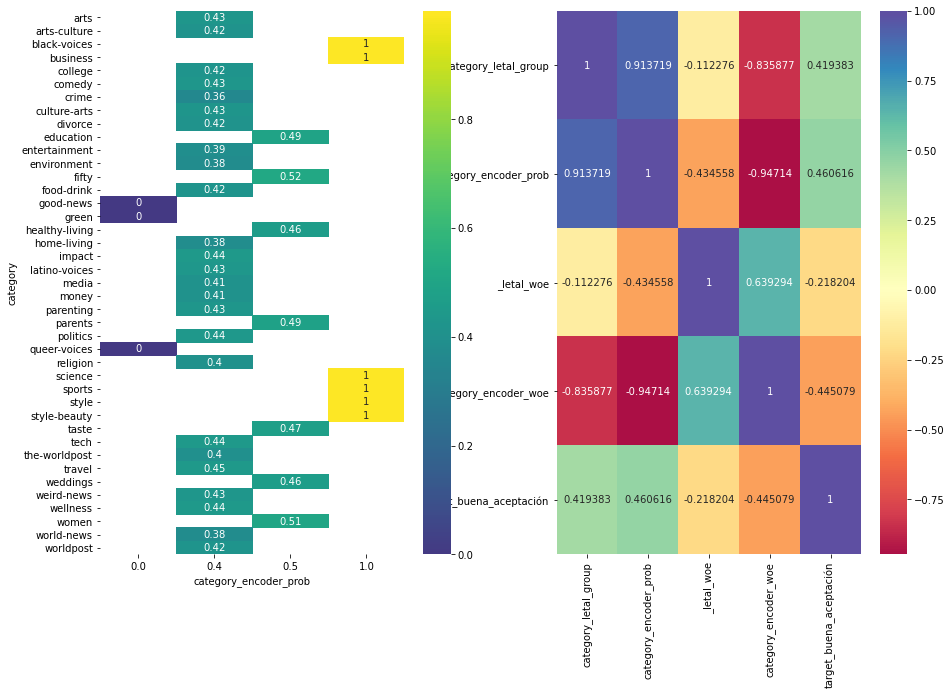

In [13]:
df = _encoder_cat_prob(df, 'category', col_target='target_buena_aceptación', window_letal=0.1)

### EL METODO CREADO MUESTRA MAYOR CORRELACION DIRECTA CON EL TARGET FICTICIO, TANTO EN EL GRUPO CATEGORICO ORDINAL COMO EN EL LETAL =)